In [1]:
# 한글 폰트 다운 (다운 완료시 런타임 재시작 수행해주세요!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,798 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and di

In [1]:
# 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.5 MB/s eta 0:00:00


In [4]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
## 라이브러리 설치
import os
import requests 
from tqdm import tqdm
from haversine import haversine, Unit

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import colour
from colour import Color
from matplotlib import rc
import missingno as msno

import json
import geopandas as gpd
import folium
from folium.features import CustomIcon

import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

rc('font', family='NanumBarunGothic')
warnings.filterwarnings("ignore")

In [6]:
hotel_df = pd.read_csv('/content/drive/MyDrive/부산 관광 아이디어 공모전/모델링) 세부분석 /부전2동/데이터/부산진구숙소(최종).csv', encoding='cp949')

In [7]:
hotel_df.drop('Unnamed: 0', axis=1, inplace=True)

# 유형별 시설 집계

## 업무

In [8]:
study_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'스터디카페',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000} 
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()
    study_num.append(total)

study_num

100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


[{'documents': [{'address_name': '부산 부산진구 전포동 692-1',
    'category_group_code': '',
    'category_group_name': '',
    'category_name': '서비스,산업 > 전문대행 > 공간대여 > 스터디카페,스터디룸 > 플랜에이스터디카페',
    'distance': '738',
    'id': '434471129',
    'phone': '051-802-7033',
    'place_name': '플랜에이스터디카페 부산서면센터',
    'place_url': 'http://place.map.kakao.com/434471129',
    'road_address_name': '부산 부산진구 전포대로199번길 43',
    'x': '129.062848157252',
    'y': '35.1542334922606'},
   {'address_name': '부산 부산진구 부전동 241-15',
    'category_group_code': '',
    'category_group_name': '',
    'category_name': '서비스,산업 > 전문대행 > 공간대여 > 스터디카페,스터디룸',
    'distance': '471',
    'id': '926311966',
    'phone': '0507-1435-5591',
    'place_name': '이룸 스터디룸',
    'place_url': 'http://place.map.kakao.com/926311966',
    'road_address_name': '부산 부산진구 중앙대로 679-8',
    'x': '129.058741466575',
    'y': '35.1536806674899'},
   {'address_name': '부산 부산진구 부전동 241-34',
    'category_group_code': '',
    'category_group_name': '',
 

In [ ]:
study_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'스터디카페',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000} 
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()
    study_num.append(len([s for s in [i['category_name'] for i in total['documents']] if "스터디카페" in s]))

study_num

100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


[14, 8, 8, 8, 8, 15, 13, 14, 13]

In [ ]:
hotel_df['스터디카페'] = study_num

In [ ]:
office_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'공유오피스',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()
    office_num.append(len([s for s in [i['category_name'] for i in total['documents']] if "공유오피스" in s]))

office_num

100%|██████████| 9/9 [00:07<00:00,  1.18it/s]


[6, 3, 3, 3, 3, 9, 8, 8, 8]

In [ ]:
hotel_df['공유오피스'] = office_num

## 관광

In [ ]:
tour_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'관광지',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 10000} # 관광지만 10km
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    tour_num.append(total)

tour_num

100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


[799, 793, 793, 793, 793, 789, 788, 789, 788]

In [ ]:
hotel_df['관광지'] = tour_num

## 편의

In [ ]:
pharmacy_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'약국',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    pharmacy_num.append(total)

pharmacy_num

100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


[79, 72, 72, 72, 72, 88, 83, 88, 83]

In [ ]:
hotel_df['약국'] = pharmacy_num

In [ ]:
hospital_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'병원',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    hospital_num.append(total)

hospital_num

100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


[485, 459, 459, 459, 459, 519, 497, 517, 497]

In [ ]:
hotel_df['병원'] = hospital_num

In [ ]:
# 병원의 경우, if 노인, 요양병원도 함께 집계된다면 해당 경우는 빼줌
# hotel_df['병원'] = [ai - bi for ai, bi in zip(hospital_num, nursing_hospital_num)]

In [ ]:
bank_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'은행',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    bank_num.append(total)
bank_num

100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


[160, 132, 132, 132, 132, 165, 154, 163, 154]

In [ ]:
hotel_df['은행'] = bank_num

In [ ]:
supermarket_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'대형마트',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    supermarket_num.append(total)
supermarket_num

100%|██████████| 9/9 [00:07<00:00,  1.18it/s]


[4, 4, 4, 4, 4, 3, 2, 3, 2]

In [ ]:
hotel_df['대형마트'] = supermarket_num

In [ ]:
convenience_store_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'편의점',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    convenience_store_num.append(total)
convenience_store_num

100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


[130, 101, 101, 101, 101, 151, 134, 148, 134]

In [ ]:
hotel_df['편의점'] = convenience_store_num

In [ ]:
sing_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'노래방',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    sing_num.append(total)
sing_num

100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


[115, 91, 91, 91, 91, 121, 114, 118, 114]

In [ ]:
hotel_df['노래방'] = sing_num

In [ ]:
pc_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'게임방,PC방',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    pc_num.append(total)
pc_num

100%|██████████| 9/9 [00:07<00:00,  1.14it/s]


[9, 5, 5, 5, 5, 9, 9, 9, 9]

In [ ]:
hotel_df['게임방,PC방'] = pc_num

In [ ]:
park_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'공원',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json() # ['meta']['total_count']
    park_num.append(len([s for s in [i['category_name'] for i in total['documents']] if "여행 > 공원" in s]))
park_num

100%|██████████| 9/9 [00:07<00:00,  1.18it/s]


[3, 5, 5, 5, 5, 2, 1, 2, 1]

In [ ]:
hotel_df['공원'] = park_num

In [ ]:
theater_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'영화관',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    theater_num.append(total)
theater_num

100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


[5, 4, 4, 4, 4, 6, 6, 6, 6]

In [ ]:
hotel_df['영화관'] = theater_num

In [ ]:
library_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'도서관',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json() # ['meta']['total_count']
    library_num.append(len([s for s in [i['category_name'] for i in total['documents']] if "교육,학문 > 학습시설 > 도서관" in s]))
library_num

100%|██████████| 9/9 [00:07<00:00,  1.20it/s]


[8, 9, 9, 9, 9, 11, 6, 12, 6]

In [ ]:
hotel_df['도서관'] = library_num

In [ ]:
gym_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'헬스장',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    gym_num.append(total)

gym_num

100%|██████████| 9/9 [00:07<00:00,  1.20it/s]


[61, 50, 50, 50, 50, 73, 60, 70, 60]

In [ ]:
hotel_df['헬스장'] = gym_num

In [ ]:
golf_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'골프연습장',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    golf_num.append(total)

golf_num

100%|██████████| 9/9 [00:07<00:00,  1.19it/s]


[19, 10, 10, 10, 10, 17, 15, 17, 15]

In [ ]:
hotel_df['골프연습장'] = golf_num

In [ ]:
swimming_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'수영장',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()# ['meta']['total_count']
    swimming_num.append(len([s for s in [i['category_name'] for i in total['documents']] if "수영장" in s]))

swimming_num

100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
hotel_df['수영장'] = swimming_num

## 식음

In [ ]:
restaurant_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'음식점',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    restaurant_num.append(total)
restaurant_num

100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


[3420, 2848, 2848, 2848, 2848, 3985, 3466, 3946, 3466]

In [ ]:
hotel_df['음식점'] = restaurant_num

In [ ]:
cafe_num = []
for i in tqdm(range(0,len(hotel_df))):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
    params = {'query':'커피전문점',
                'x': hotel_df["경도"][i],
              'y':hotel_df['위도'][i],
              'radius': 1000}
    headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
    total = requests.get(url, params=params, headers=headers).json()['meta']['total_count']
    cafe_num.append(total)
cafe_num

100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


[515, 414, 414, 414, 414, 679, 539, 663, 539]

In [ ]:
hotel_df['커피전문점'] = cafe_num

## 교통

In [ ]:
bus_df = pd.read_csv('/content/drive/MyDrive/부산 관광 아이디어 공모전/모델링) 세부분석 /부전2동/데이터/부산광역시_버스정류소.csv')
subway_df = pd.read_csv('/content/drive/MyDrive/부산 관광 아이디어 공모전/모델링) 세부분석 /부전2동/데이터/부산교통공사_도시철도역사정보.csv', encoding='utf-16')

In [ ]:
bus_df

,arsno,bstopid,bstopnm,gpsx,gpsy,stoptype
0,01001,167970102,영주삼거리,129.033262,35.115323,일반
1,01002,169310303,영주삼거리,129.033030,35.115283,일반
2,01003,167970301,시민아파트,129.031678,35.115075,일반
3,01004,167840102,시민아파트,129.032160,35.114921,일반
4,01005,167970302,중앙공원.민주공원입구,129.029858,35.114473,일반
...,...,...,...,...,...,...
8517,---,510740000,좌2동행정복지센터,129.183119,35.169047,마을
8518,---,510750000,좌동재래시장,129.172913,35.173195,마을
8519,---,510760000,좌동재래시장,129.173247,35.173347,마을
8520,---,510770000,한마음스포츠센터,129.177295,35.180100,마을


In [ ]:
subway_df

,역번호\t역사명\t노선번호\t노선명\t영문역사명\t한자역사명\t환승역구분\t환승노선번호\t환승노선명\t역위도\t역경도\t운영기관명\t역사도로명주소\t역사전화번호\t데이터기준일자
0,95\t다대포해수욕장\tS2601\t부산도시철도 1호선\tDadaepo Beach\...
1,96\t다대포항역\tS2601\t부산도시철도 1호선\tDadaepo Harbor\t...
2,97\t낫개역\tS2601\t부산도시철도 1호선\tNatgae\t羅 浦\t일반역\t...
3,98\t신장림역\tS2601\t부산도시철도 1호선\tSinjangnim\t新長林\t...
4,99\t장림역\tS2601\t부산도시철도 1호선\tJangnim\t長林\t일반역\t...
...,...
109,410\t석대역\tS2604\t부산도시철도 4호선\tSeokdae\t石坮\t일반역\...
110,411\t영산대역\tS2604\t부산도시철도 4호선\tYoungsan Univ.\t...
111,412\t윗반송역\tS2604\t부산도시철도 4호선\tWitbansong\t上盘松\...
112,413\t고촌역\tS2604\t부산도시철도 4호선\tGochon\t古村\t일반역\t...


In [ ]:
# 지하철역 데이터 정리
subway_df = pd.DataFrame(subway_df.iloc[:,0].str.split('\t').tolist(), columns=subway_df.columns[0].split('\t'))

In [ ]:
subway_df

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,95,다대포해수욕장,S2601,부산도시철도 1호선,Dadaepo Beach,多大浦海水浴場,일반역,,,35.04867,128.9641,부산교통공사,부산광역시 사하구 다대로 지하 692,051-678-6195,2021-02-26
1,96,다대포항역,S2601,부산도시철도 1호선,Dadaepo Harbor,多大浦港,일반역,,,35.05782,128.9713,부산교통공사,부산광역시 사하구 다대로 지하 548,051-678-6196,2021-02-26
2,97,낫개역,S2601,부산도시철도 1호선,Natgae,羅 浦,일반역,,,35.065265,128.979873,부산교통공사,부산광역시 사하구 다대로 지하 422,051-678-6197,2021-02-26
3,98,신장림역,S2601,부산도시철도 1호선,Sinjangnim,新長林,일반역,,,35.074433,128.977041,부산교통공사,부산광역시 사하구 다대로 지하 310,051-678-6198,2021-02-26
4,99,장림역,S2601,부산도시철도 1호선,Jangnim,長林,일반역,,,35.08109,128.9775,부산교통공사,부산광역시 사하구 다대로 지하 230,051-618-6199,2021-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,410,석대역,S2604,부산도시철도 4호선,Seokdae,石坮,일반역,,,35.21811162,129.137179,부산교통공사,부산광역시 해운대구 석대천로 121,051-678-6410,2021-02-26
110,411,영산대역,S2604,부산도시철도 4호선,Youngsan Univ.,靈山大,일반역,,,35.225777,129.146149,부산교통공사,부산광역시 해운대구 반송로 803,051-678-6411,2021-02-26
111,412,윗반송역,S2604,부산도시철도 4호선,Witbansong,上盘松,일반역,,,35.232506,129.154024,부산교통공사,부산광역시 해운대구 반송로 917,051-678-6412,2021-02-26
112,413,고촌역,S2604,부산도시철도 4호선,Gochon,古村,일반역,,,35.236031,129.1604437,부산교통공사,부산광역시 기장군 철마면 반송로 991,051-678-6413,2021-02-26


In [ ]:
# 위경도 변수 실수형으로 변경
subway_df = subway_df.astype({'역위도':'float', '역경도':'float'})

In [ ]:
# 1km 내 버스정류장 개수
bus_num = []

for i in tqdm(range(len(hotel_df))):

  n = 0
  hotel_location = (hotel_df.위도[i], hotel_df.경도[i])

  for j in range(len(bus_df)):

    bus_location = (bus_df.gpsy[j], bus_df.gpsx[j])

    if haversine(hotel_location, bus_location, unit = 'km') <= 1:
      n += 1

  bus_num.append(n)

100%|██████████| 9/9 [00:01<00:00,  5.21it/s]


In [ ]:
hotel_df['버스정류장'] = bus_num

In [ ]:
# 1km 내 지하철역 개수
subway_num = []

for i in tqdm(range(len(hotel_df))):

  n = 0
  hotel_location = (hotel_df.위도[i], hotel_df.경도[i])

  for j in range(len(subway_df)):

    subway_location = (subway_df.역위도[j], subway_df.역경도[j])

    if haversine(hotel_location, subway_location, unit = 'km') <= 1:
      n += 1

  subway_num.append(n)

100%|██████████| 9/9 [00:00<00:00, 319.38it/s]


In [ ]:
hotel_df['지하철역'] = subway_num

In [ ]:
hotel_df

,숙박업소명,주소,위도,경도,스터디카페,공유오피스,관광지,약국,병원,은행,...,공원,영화관,도서관,헬스장,골프연습장,수영장,음식점,커피전문점,버스정류장,지하철역
0,(주)부산롯데호텔,부산광역시 부산진구 가야대로 772,35.156972,129.055466,14,6,799,79,485,160,...,3,5,8,61,19,0,3420,515,111,5
1,퀸스호텔,부산광역시 부산진구 부전로 56,35.163113,129.059102,8,3,793,72,459,132,...,5,4,9,50,10,0,2848,414,142,3
2,부산비즈니스호텔,부산광역시 부산진구 부전로 67,35.163113,129.059102,8,3,793,72,459,132,...,5,4,9,50,10,0,2848,414,142,3
3,TRT HOTEL,부산광역시 부산진구 부전로 33-1,35.163113,129.059102,8,3,793,72,459,132,...,5,4,9,50,10,0,2848,414,142,3
4,(주)샤이어호텔,부산광역시 부산진구 부전로 18-5,35.163113,129.059102,8,3,793,72,459,132,...,5,4,9,50,10,0,2848,414,142,3
5,트래블라이트,부산광역시 부산진구 서면로68번길 52,35.155352,129.058385,15,9,789,88,519,165,...,2,6,11,73,17,0,3985,679,122,6
6,라이온호텔,부산광역시 부산진구 중앙대로691번가길 14-7,35.154961,129.055775,13,8,788,83,497,154,...,1,6,6,60,15,0,3466,539,104,5
7,사우스반데코 호텔,부산광역시 부산진구 서면로 6,35.155351,129.057795,14,8,789,88,517,163,...,2,6,12,70,17,0,3946,663,124,6
8,하운드호텔,부산광역시 부산진구 중앙대로691번가길 10,35.154961,129.055775,13,8,788,83,497,154,...,1,6,6,60,15,0,3466,539,104,5


# 유형별 변수 정리

In [ ]:
hotel_df.columns

Index(['숙박업소명', '주소', '위도', '경도', '스터디카페', '공유오피스', '관광지', '약국', '병원', '은행',
       '대형마트', '편의점', '노래방', '게임방,PC방', '공원', '영화관', '도서관', '헬스장', '골프연습장',
       '수영장', '음식점', '커피전문점', '버스정류장', '지하철역'],
      dtype='object')

In [ ]:
# 편의시설
hotel_df['편의시설'] = sum([hotel_df['약국'], hotel_df['병원'], hotel_df['은행'], hotel_df['대형마트'], hotel_df['편의점'], hotel_df['노래방'], hotel_df['게임방,PC방'],
                        hotel_df['공원'], hotel_df['영화관'], hotel_df['도서관'], hotel_df['헬스장'], hotel_df['골프연습장'], hotel_df['수영장']])

In [ ]:
# 업무시설
hotel_df['업무시설'] = sum([hotel_df['스터디카페'], hotel_df['공유오피스']])

In [ ]:
# 식음시설
hotel_df['식음시설'] = sum([hotel_df['음식점'], hotel_df['커피전문점']])

In [ ]:
# 교통시설
hotel_df['교통시설'] = sum([hotel_df['버스정류장'], hotel_df['지하철역']])

In [ ]:
hotel_df_radar = hotel_df[['숙박업소명', '주소', '편의시설', '업무시설', '식음시설', '교통시설', '관광지']]

In [ ]:
hotel_df_radar

,숙박업소명,주소,편의시설,업무시설,식음시설,교통시설,관광지
0,(주)부산롯데호텔,부산광역시 부산진구 가야대로 772,1078,20,3935,116,799
1,퀸스호텔,부산광역시 부산진구 부전로 56,942,11,3262,145,793
2,부산비즈니스호텔,부산광역시 부산진구 부전로 67,942,11,3262,145,793
3,TRT HOTEL,부산광역시 부산진구 부전로 33-1,942,11,3262,145,793
4,(주)샤이어호텔,부산광역시 부산진구 부전로 18-5,942,11,3262,145,793
5,트래블라이트,부산광역시 부산진구 서면로68번길 52,1165,24,4664,128,789
6,라이온호텔,부산광역시 부산진구 중앙대로691번가길 14-7,1081,21,4005,109,788
7,사우스반데코 호텔,부산광역시 부산진구 서면로 6,1153,22,4609,130,789
8,하운드호텔,부산광역시 부산진구 중앙대로691번가길 10,1081,21,4005,109,788


# 방사형 차트 시각화

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   

scaler = scaler.fit_transform(hotel_df_radar.loc[:, ['편의시설', '업무시설', '식음시설', '교통시설', '관광지']])

scaler

array([[ 0.46876089,  0.58006955,  0.23480836, -0.95848559,  2.17832459],
       [-1.0572054 , -1.0979888 , -1.0029934 ,  0.99592643,  0.39605902],
       [-1.0572054 , -1.0979888 , -1.0029934 ,  0.99592643,  0.39605902],
       [-1.0572054 , -1.0979888 , -1.0029934 ,  0.99592643,  0.39605902],
       [-1.0572054 , -1.0979888 , -1.0029934 ,  0.99592643,  0.39605902],
       [ 1.4449305 ,  1.32587326,  1.575607  , -0.14976337, -0.79211803],
       [ 0.50242191,  0.76652048,  0.36355445, -1.43024022, -1.0891623 ],
       [ 1.31028641,  0.95297141,  1.47444935, -0.01497634, -0.79211803],
       [ 0.50242191,  0.76652048,  0.36355445, -1.43024022, -1.0891623 ]])

In [ ]:
hotel_df_radar_sc = hotel_df_radar.copy()
hotel_df_radar_sc[['편의시설', '업무시설', '식음시설', '교통시설', '관광지']] = scaler

In [ ]:
hotel_df_radar_sc

,숙박업소명,주소,편의시설,업무시설,식음시설,교통시설,관광지
0,(주)부산롯데호텔,부산광역시 부산진구 가야대로 772,0.468761,0.580070,0.234808,-0.958486,2.178325
1,퀸스호텔,부산광역시 부산진구 부전로 56,-1.057205,-1.097989,-1.002993,0.995926,0.396059
2,부산비즈니스호텔,부산광역시 부산진구 부전로 67,-1.057205,-1.097989,-1.002993,0.995926,0.396059
3,TRT HOTEL,부산광역시 부산진구 부전로 33-1,-1.057205,-1.097989,-1.002993,0.995926,0.396059
4,(주)샤이어호텔,부산광역시 부산진구 부전로 18-5,-1.057205,-1.097989,-1.002993,0.995926,0.396059
5,트래블라이트,부산광역시 부산진구 서면로68번길 52,1.444930,1.325873,1.575607,-0.149763,-0.792118
6,라이온호텔,부산광역시 부산진구 중앙대로691번가길 14-7,0.502422,0.766520,0.363554,-1.430240,-1.089162
7,사우스반데코 호텔,부산광역시 부산진구 서면로 6,1.310286,0.952971,1.474449,-0.014976,-0.792118
8,하운드호텔,부산광역시 부산진구 중앙대로691번가길 10,0.502422,0.766520,0.363554,-1.430240,-1.089162


In [ ]:
categories = ['편의시설', '업무시설', '식음시설', '교통시설', '관광지']
categories = [*categories, categories[0]]

In [ ]:
hotel_grade = hotel_df_radar_sc.loc[0, ['편의시설', '업무시설', '식음시설', '교통시설', '관광지']].tolist()
hotel_grade = [*hotel_grade, hotel_grade[0]]

In [ ]:
label_loc = np.linspace(start=0, stop=2*np.pi, num=len(hotel_grade))

100%|██████████| 9/9 [00:00<00:00, 472.62it/s]


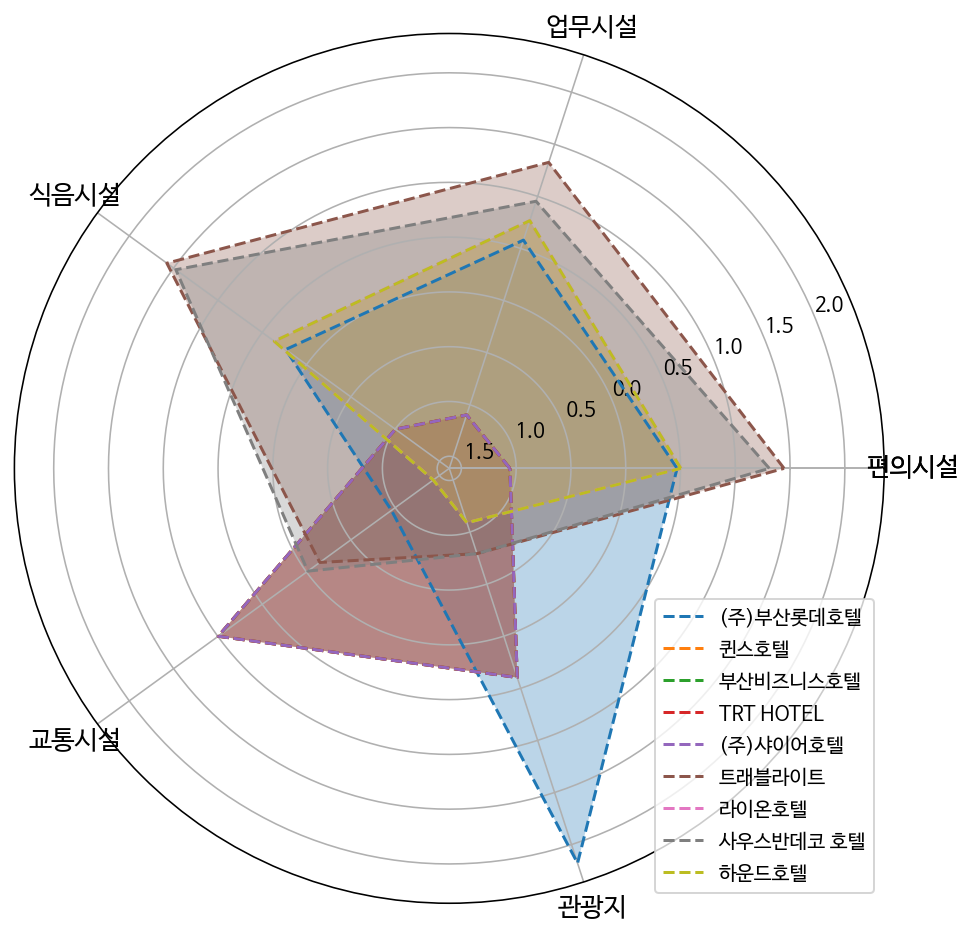

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)

for i in tqdm(range(len(hotel_df_radar_sc))):
  hotel_grade = hotel_df_radar_sc.loc[i, ['편의시설', '업무시설', '식음시설', '교통시설', '관광지']].tolist()
  hotel_grade = [*hotel_grade, hotel_grade[0]]

  ax.plot(label_loc, hotel_grade, label=hotel_df_radar.숙박업소명[i], linestyle='dashed')
  ax.fill(label_loc, hotel_grade, alpha=0.3)

ax.legend()
plt.show()

✈ 1. 부산롯데호텔
  2. 트래블라이트 -> 게하 제거 2등 버리자
  3. 사우스반데코 -> 좋지만,,, 1등이 너무 좋다

In [ ]:
# 관광 프로그램 제안을 위해 관광지 list를 뽑아보자
url = 'https://dapi.kakao.com/v2/local/search/keyword.json' 
params = {'query':'관광지',
          'x': hotel_df.loc[7, '경도'],
          'y': hotel_df.loc[7, '위도'],
          'radius': 10000} # 관광지만 10km
headers = {"Authorization": "KakaoAK ea955b4e90386bf89fcd94c7d362e516"} 
total = requests.get(url, params=params, headers=headers).json() # ['meta']['total_count']

total

{'documents': [{'address_name': '부산 수영구 광안동 192-20',
   'category_group_code': 'AT4',
   'category_group_name': '관광명소',
   'category_name': '여행 > 관광,명소 > 해수욕장,해변',
   'distance': '5582',
   'id': '8202423',
   'phone': '051-610-4744',
   'place_name': '광안리해수욕장',
   'place_url': 'http://place.map.kakao.com/8202423',
   'road_address_name': '부산 수영구 광안해변로 219',
   'x': '129.118976093583',
   'y': '35.1531932736837'},
  {'address_name': '부산 남구 문현동 1227-2',
   'category_group_code': 'AT4',
   'category_group_name': '관광명소',
   'category_name': '여행 > 관광,명소 > 동물원 > 실내동물원',
   'distance': '1057',
   'id': '264928678',
   'phone': '051-710-1022',
   'place_name': '캐니언파크 부산점',
   'place_url': 'http://place.map.kakao.com/264928678',
   'road_address_name': '부산 남구 전포대로 133',
   'x': '129.06547083683037',
   'y': '35.14821048402504'},
  {'address_name': '부산 부산진구 전포동 682',
   'category_group_code': 'AT4',
   'category_group_name': '관광명소',
   'category_name': '여행 > 관광,명소 > 테마거리',
   'distance': '435',